In [54]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
from pyathena import connect

In [55]:
!pip install PyAthena

In [56]:
conn = connect(region_name='us-east-2', s3_staging_dir='s3://lab4data-cs437/2025/')

In [67]:
query = '''
    SELECT * 
    FROM "AwsDataCatalog"."cs437-database-firehose"."2025"
    order by vehicle_id, timestep_time
'''

# Fetch results into a pandas DataFrame
df = pd.read_sql(query, conn)

len(df)

/tmp/ipykernel_16057/1421779330.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


50130

In [60]:
query = '''
    SELECT timestep_time, vehicle_co2, vehicle_id 
    FROM "AwsDataCatalog"."cs437-database-firehose"."2025"
    WHERE vehicle_co2 IS NOT NULL 
      AND timestep_time IS NOT NULL 
      AND vehicle_id IS NOT NULL
    order by vehicle_id, timestep_time
'''

# Fetch results into a pandas DataFrame
df = pd.read_sql(query, conn)

df

/tmp/ipykernel_16057/1232608710.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,timestep_time,vehicle_co2,vehicle_id
0,0.0,2416.04,veh0
1,0.0,2416.04,veh0
2,0.0,2416.04,veh0
3,0.0,2416.04,veh0
4,0.0,2416.04,veh0
...,...,...,...
16374,160.0,7829.17,veh4
16375,160.0,7829.17,veh4
16376,160.0,7829.17,veh4
16377,160.0,7829.17,veh4


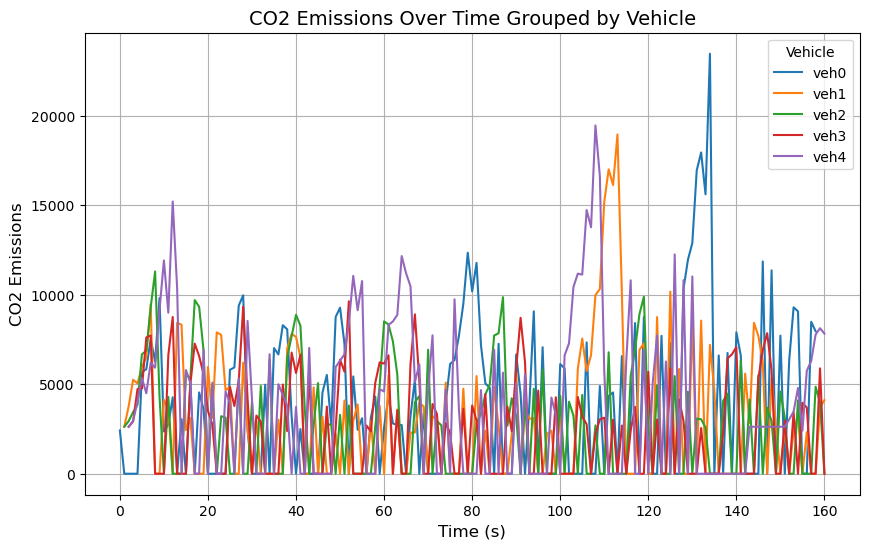

In [61]:
vehicles = df['vehicle_id'].unique()

plt.figure(figsize=(10, 6))

for vehicle in vehicles:
    vehicle_data = df[df['vehicle_id'] == vehicle]
    plt.plot(vehicle_data['timestep_time'], vehicle_data['vehicle_co2'], label=vehicle)

plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('CO2 Emissions', fontsize=12)
plt.title('CO2 Emissions Over Time Grouped by Vehicle', fontsize=14)
plt.legend(title='Vehicle')
plt.grid(True)

In [62]:
query = '''
    SELECT vehicle_speed, vehicle_co2, vehicle_id 
    FROM "AwsDataCatalog"."cs437-database-firehose"."2025"
    WHERE vehicle_speed IS NOT NULL 
      AND timestep_time IS NOT NULL 
      AND vehicle_id IS NOT NULL
    order by vehicle_id, timestep_time
'''

# Fetch results into a pandas DataFrame
df = pd.read_sql(query, conn)

df

/tmp/ipykernel_16057/1326646567.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,vehicle_speed,vehicle_co2,vehicle_id
0,14.72,2416.04,veh0
1,14.72,2416.04,veh0
2,14.72,2416.04,veh0
3,14.72,2416.04,veh0
4,14.72,2416.04,veh0
...,...,...,...
16374,14.19,7829.17,veh4
16375,14.19,7829.17,veh4
16376,14.19,7829.17,veh4
16377,14.19,7829.17,veh4


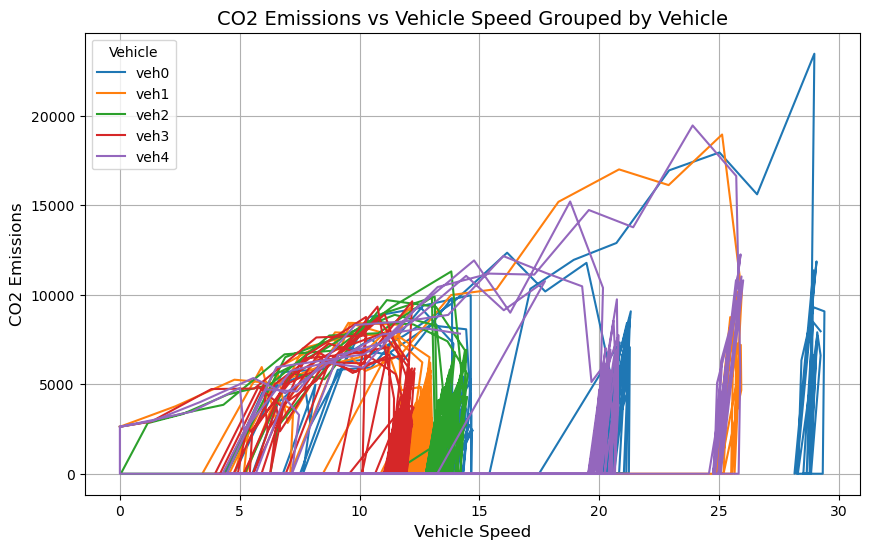

In [63]:
vehicles = df['vehicle_id'].unique()

plt.figure(figsize=(10, 6))

for vehicle in vehicles:
    vehicle_data = df[df['vehicle_id'] == vehicle]
    plt.plot(vehicle_data['vehicle_speed'], vehicle_data['vehicle_co2'], label=vehicle)

plt.xlabel('Vehicle Speed', fontsize=12)
plt.ylabel('CO2 Emissions', fontsize=12)
plt.title('CO2 Emissions vs Vehicle Speed Grouped by Vehicle', fontsize=14)
plt.legend(title='Vehicle')
plt.grid(True)

In [64]:
query = '''
    SELECT vehicle_noise, vehicle_co2, vehicle_id
    FROM "AwsDataCatalog"."cs437-database-firehose"."2025"
    WHERE vehicle_noise IS NOT NULL 
      AND timestep_time IS NOT NULL 
      AND vehicle_id IS NOT NULL
    order by vehicle_waiting desc
'''

# Fetch results into a pandas DataFrame
df = pd.read_sql(query, conn)

df

/tmp/ipykernel_16057/456737667.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,vehicle_noise,vehicle_co2,vehicle_id
0,55.94,2624.72,veh4
1,55.94,2624.72,veh4
2,55.94,2624.72,veh4
3,55.94,2624.72,veh4
4,55.94,2624.72,veh4
...,...,...,...
16374,55.94,2624.72,veh4
16375,65.15,2416.04,veh0
16376,55.94,2624.72,veh2
16377,65.15,2416.04,veh0


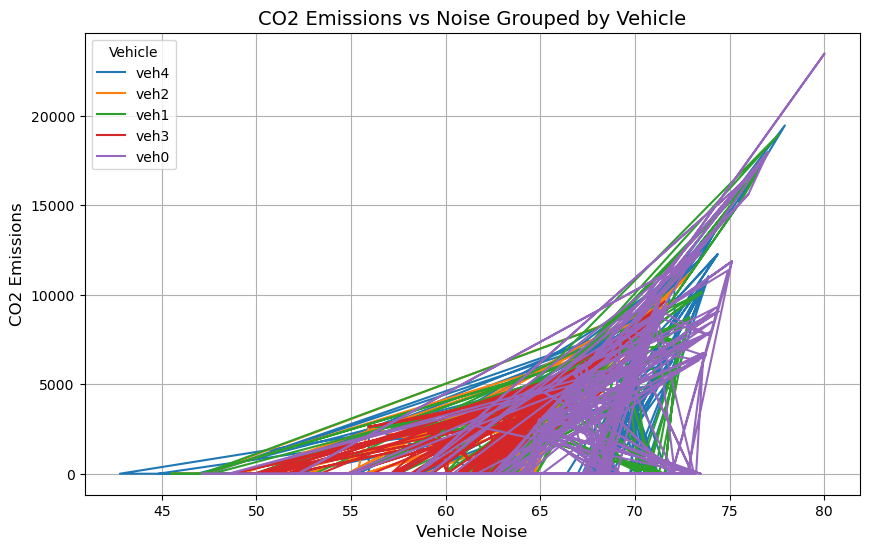

In [65]:
vehicles = df['vehicle_id'].unique()

plt.figure(figsize=(10, 6))

for vehicle in vehicles:
    vehicle_data = df[df['vehicle_id'] == vehicle]
    plt.plot(vehicle_data['vehicle_noise'], vehicle_data['vehicle_co2'], label=vehicle)

plt.xlabel('Vehicle Noise', fontsize=12)
plt.ylabel('CO2 Emissions', fontsize=12)
plt.title('CO2 Emissions vs Noise Grouped by Vehicle', fontsize=14)
plt.legend(title='Vehicle')
plt.grid(True)